In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 


from scipy import stats
from scipy.stats import norm, skew 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 

In [2]:
abspath = '/home/semipro321/Documents/Workspace/Geospatial-Analysis-on-House-Price-Prediction/'
df = pd.read_csv(abspath + 'Inputs/mastermodel_filledv4.csv')

In [3]:
# from sklearn.ensemble import ExtraTreesRegressor

# sns.set_style("whitegrid")
# plt.figure(figsize=[25,30])
# model = ExtraTreesRegressor(n_estimators=10)
# model.fit(df.drop('final_price', axis=1), df.final_price)
# # display the relative importance of each attribute

# sorted_feature_importance = sorted(zip(model.feature_importances_, df.drop('final_price', axis=1).columns))

# x = [a[0] for a in sorted_feature_importance]
# y = [a[1] for a in sorted_feature_importance]

# plt.scatter(x,y)
# plt.title('Feature Importances')
# plt.show()

In [4]:
df.columns

Index(['sqft', 'parking', 'mean_district_income', 'bedrooms_bg', 'bedrooms_ag',
       'bathrooms', 'final_price', 'type_Att/Row/Twnhouse', 'type_Co-Op Apt',
       'type_Co-Ownership Apt',
       ...
       'neighbourhood_York University Heights',
       'neighbourhood_Yorkdale-Glen Park', 'Auto Theft500m', 'Auto Theft1000m',
       'violent_crime1000m', 'violent_crime500m', 'Airbnb500m_YOY1519',
       'Airbnb1000m_YOY1519', 'dist_nearest_park', 'dist_nearest_hospital'],
      dtype='object', length=168)

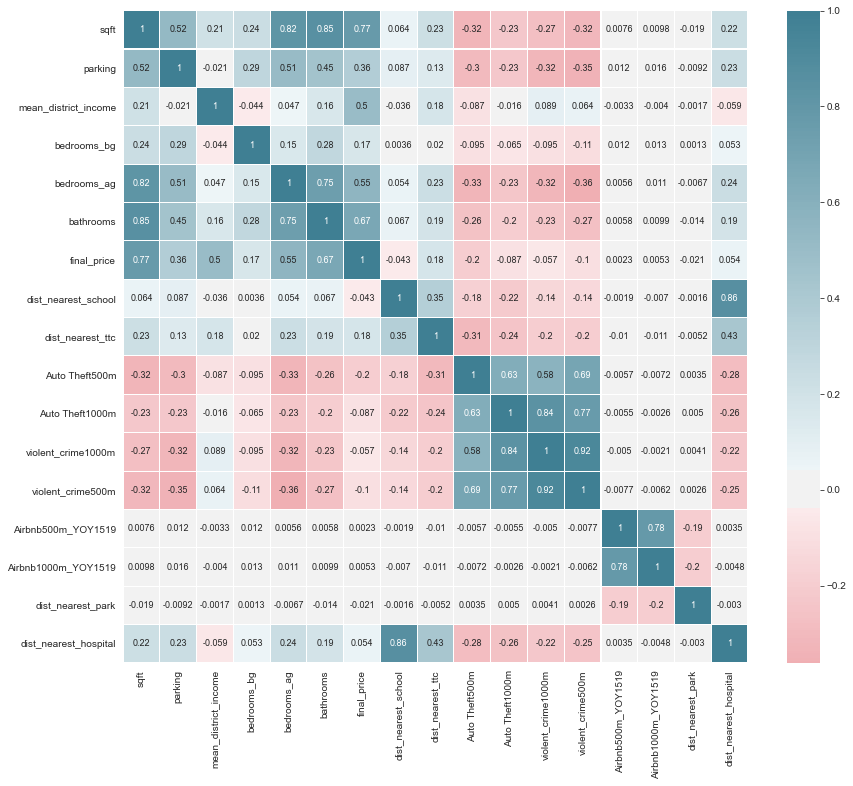

In [5]:
notdummycolumns = []
for i in df.columns:
    if not'type' in i and not 'neighbourhood' in i:
        notdummycolumns.append(i)

def correlantion_heatmap(df, center = None):
    fig, ax = plt.subplots(figsize = [14,12])
    colormap = sns.diverging_palette(10, 220, as_cmap=True)
    fig = sns.heatmap(df.corr(),
                cmap = colormap,
               center = center,
                annot = True,
                linewidths = 0.1,
                annot_kws={'fontsize':9})
    
    
correlantion_heatmap(df[notdummycolumns], center=0)

In [6]:
numeric_feats = ['sqft', 'mean_district_income', 'final_price']
skewness = pd.DataFrame({
    'Skew': df[notdummycolumns].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)})

skewness = skewness[abs(skewness.Skew) > 0.75]
skewness


,Skew
dist_nearest_school,6.758
dist_nearest_hospital,6.603
final_price,4.224
mean_district_income,3.353
Airbnb500m_YOY1519,2.877
Airbnb1000m_YOY1519,2.651
violent_crime500m,2.481
violent_crime1000m,2.318
parking,2.008
bathrooms,1.677


In [7]:
log_col = ['sqft','mean_district_income','final_price','dist_nearest_school', 'dist_nearest_ttc', 'dist_nearest_park', 'dist_nearest_hospital']
for i in log_col:
    df[i] = np.log1p(df[i])


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('final_price', axis=1), df.final_price, train_size=0.7,
                                                    stratify=df['type_Condo Apt'].values)

In [9]:
from sklearn.utils.testing import all_estimators
from sklearn import base
from sklearn.metrics import make_scorer


estimators = all_estimators()

for name, class_ in estimators:
    if issubclass(class_, base.RegressorMixin):
        print(name)

ARDRegression
AdaBoostRegressor
BaggingRegressor
BayesianRidge
CCA
DecisionTreeRegressor
DummyRegressor
ElasticNet
ElasticNetCV
ExtraTreeRegressor
ExtraTreesRegressor
GammaRegressor
GaussianProcessRegressor
GeneralizedLinearRegressor
GradientBoostingRegressor
HistGradientBoostingRegressor
HuberRegressor
IsotonicRegression
KNeighborsRegressor
KernelRidge
Lars
LarsCV
Lasso
LassoCV
LassoLars
LassoLarsCV
LassoLarsIC
LinearRegression
LinearSVR
MLPRegressor
MultiOutputRegressor
MultiTaskElasticNet
MultiTaskElasticNetCV
MultiTaskLasso
MultiTaskLassoCV
NuSVR
OrthogonalMatchingPursuit
OrthogonalMatchingPursuitCV
PLSCanonical
PLSRegression
PassiveAggressiveRegressor
PoissonRegressor
RANSACRegressor
RadiusNeighborsRegressor
RandomForestRegressor
RegressorChain
Ridge
RidgeCV
SGDRegressor
SVR
StackingRegressor
TheilSenRegressor
TransformedTargetRegressor
TweedieRegressor
VotingRegressor
_SigmoidCalibration


In [10]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, ARDRegression, BayesianRidge, HuberRegressor, LarsCV, OrthogonalMatchingPursuitCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import NuSVR, SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, cross_validate, GridSearchCV, KFold,cross_val_score
from sklearn.isotonic import  IsotonicRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error


MLA = [
#     #Ensemble Methods
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(objective='reg:squarederror'),
    
    
#     #Kernel ridge regression
#     KernelRidge(),
    
#     #GLM
    LinearRegression(),
    make_pipeline(RobustScaler(), LassoCV()),
    make_pipeline(RobustScaler(), ElasticNetCV()),
    RidgeCV(),
    LarsCV(),
    BayesianRidge(),
    HuberRegressor(),
    OrthogonalMatchingPursuitCV(),
    
#    #Decomposition
    PLSRegression(),
    
#     #KNN
    KNeighborsRegressor(),
    
    #SVM
    NuSVR(),
    SVR(),
    
#     #Tree Models
    DecisionTreeRegressor()   
    ]

In [11]:
def custom_mae_(y, y_pred, **kwargs):
    # y_pred[y_pred > 5] = 5
    y = np.expm1(pd.DataFrame(y)) 
    y_pred = np.expm1(pd.DataFrame(y_pred))  
    return mean_absolute_error(y, y_pred)

custom_mae = make_scorer(custom_mae_, greater_is_better=False)

def custom_mape_(y, y_pred, **kwargs):
    # y_pred[y_pred > 5] = 5
    y = np.expm1(pd.DataFrame(y)) 
    y_pred = np.expm1(pd.DataFrame(y_pred)) 
    return np.mean(np.abs((y - y_pred) / y)) * 100

custom_mape = make_scorer(custom_mape_, greater_is_better=False)


def custom_rmse_(y, y_pred, **kwargs):
    # y_pred[y_pred > 5] = 5
    y = np.expm1(pd.DataFrame(y)) 
    y_pred = np.expm1(pd.DataFrame(y_pred))
    return np.sqrt(mean_squared_error(y, y_pred))

custom_rmse = make_scorer(custom_rmse_, greater_is_better=False)

In [12]:
cv_split = KFold(n_splits=5, shuffle=True, random_state=10) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    print(MLA_name + '_'*10, end="\r")
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = cross_validate(alg, X_train, y_train, cv  = cv_split,
                               return_train_score=True, scoring=custom_mae)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = -cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = -cv_results['test_score'].mean()
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    
    row_index+=1
    
    
MLA_compare.sort_values('MLA Test Accuracy Mean', inplace = True, ascending = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
2,ExtraTreesRegressor,"{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...",7.442,98127.219,11396.203,6.888
6,XGBRegressor,"{'objective': 'reg:squarederror', 'base_score'...",62318.307,101351.549,8750.039,1.626
5,LGBMRegressor,"{'boosting_type': 'gbdt', 'class_weight': None...",81296.612,102384.362,7630.436,0.201
4,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",40075.159,106726.614,12755.068,8.851
1,BaggingRegressor,"{'base_estimator': None, 'bootstrap': True, 'b...",45158.375,112277.744,18081.745,1.057
3,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",113501.402,119716.205,9676.151,3.213
12,BayesianRidge,"{'alpha_1': 1e-06, 'alpha_2': 1e-06, 'alpha_in...",117955.718,120531.599,10749.024,0.048
10,RidgeCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'cv': No...",117932.108,120557.945,10735.339,0.071
7,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",117936.138,120570.580,10722.580,0.040
11,LarsCV,"{'copy_X': True, 'cv': None, 'eps': 2.22044604...",120064.678,122561.741,10018.127,0.435


In [14]:
MLA_compare.to_csv('comparingmodels.csv', index=False)

In [24]:
MLA_compare.drop(MLA_compare.index[9:,],inplace=True)

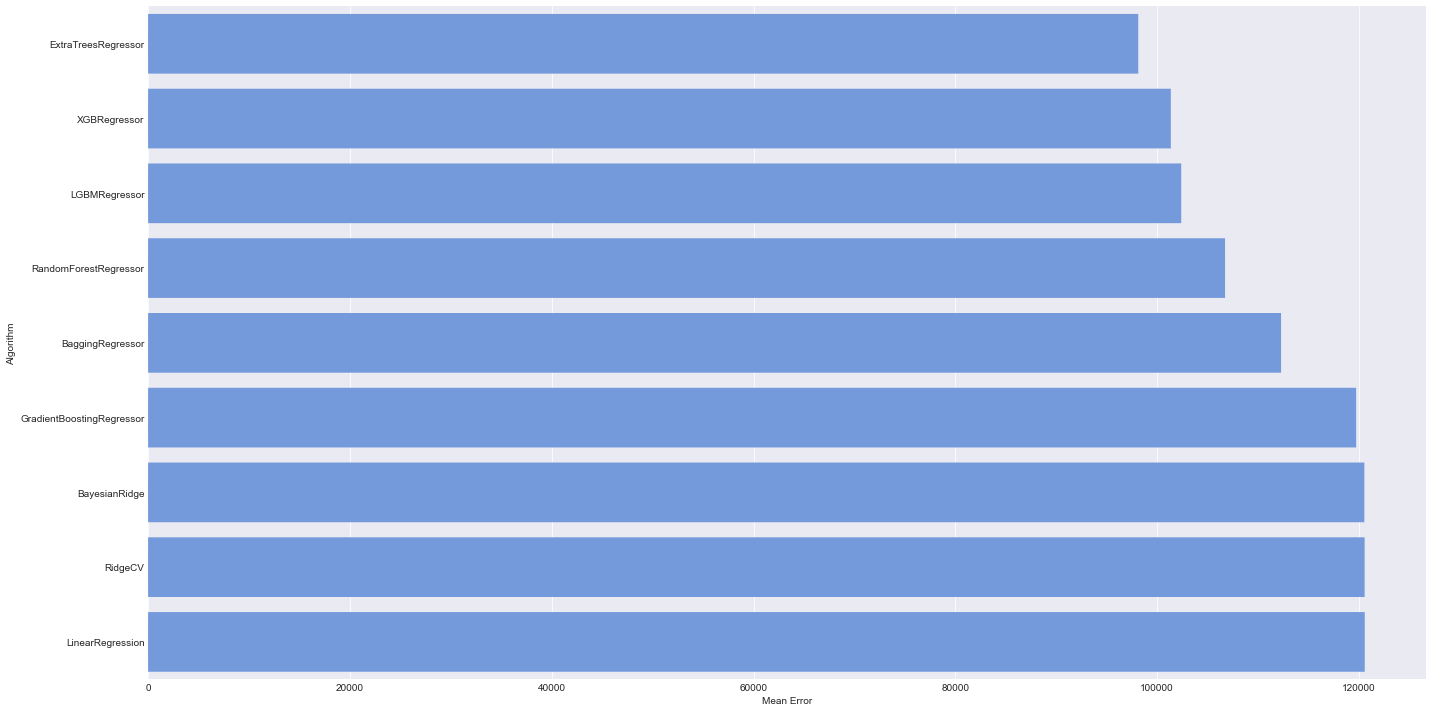

In [38]:
from matplotlib.patches import FancyBboxPatch

# fig, ax = plt.subplots(figsize = [16,8])

# sns.barplot(x = 'MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare,  palette="Blues")
plt.subplots(figsize=(20, 10))
# sns.set_color_codes("pastel")
ax = sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', data = MLA_compare,  joinstyle='bevel', color='#6495ed')

new_patches = []
for patch in reversed(ax.patches):
    # print(bb.xmin, bb.ymin,abs(bb.width), abs(bb.height))
    bb = patch.get_bbox()
    color = patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=-0.0040,rounding_size=2",
                            ec="none", fc=color,
                            mutation_aspect=0.2
                            )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)

sns.despine(left=True, bottom=True)

ax.tick_params(axis=u'both', which=u'both', length=0)
plt.tight_layout()
plt.savefig("data.png", bbox_inches="tight")
plt.xlabel('Mean Error')
plt.ylabel('Algorithm')
plt.show()

In [16]:
import csv
from hyperopt import STATUS_OK
from timeit import default_timer as timer

MAX_EVALS = 200

train_set = lgb.Dataset(X_train, label = y_train)

# f(preds: array, train_data: Dataset) -> name: string, eval_result: float, is_higher_better: bool
# How: https://github.com/Microsoft/LightGBM/blob/master/examples/python-guide/advanced_example.py
def custom_mae_lgb(y_pred, y):
    # Replace too big values
    y_pred[y_pred > 5] = 5
    
    y = np.expm1(pd.DataFrame(y.get_label()))
    y_pred = np.expm1(pd.DataFrame(y_pred))
    return 'custom_mae_lgb', mean_absolute_error(y, y_pred), False


def objective(params):
    """Objective function for Gradient Boosting Machine Hyperparameter Optimization"""
    
    # Keep track of evals
    global ITERATION
    
    ITERATION += 1
    
    # Retrieve the subsample if present otherwise set to 1.0
    subsample = params['boosting_type'].get('subsample', 1.0)
    
    # Extract the boosting type
    params['boosting_type'] = params['boosting_type']['boosting_type']
    params['subsample'] = subsample
    
    # Make sure parameters that need to be integers are integers
    for parameter_name in ['num_leaves', 'subsample_for_bin', 'min_child_samples']:
        params[parameter_name] = int(params[parameter_name])
        
    start = timer()

    # Perform n_folds cross validation
    cv_results = lgb.cv(params, train_set, num_boost_round = 1000, folds=cv_split, 
                        early_stopping_rounds = 50, seed = 50, stratified=False, feval=custom_mae_lgb)
    
    run_time = timer() - start
    
    # Extract the best score, Loss must be minimized
    best_score = np.min(cv_results['custom_mae_lgb-mean'])
    
    loss = best_score
    
    # Boosting rounds that returned the highest cv score
    n_estimators = int(np.argmin(cv_results['custom_mae_lgb-mean']) + 1)
    
    
    # Dictionary with information for evaluation
    return {'loss': best_score, 'params': params, 'iteration': ITERATION,
            'estimators': n_estimators, 
            'train_time': run_time, 'status': STATUS_OK}